## Chirp 2.

We construct chirp data with some gaussian noise.

We want to fit a smooth model to the data: SplinesDynamicModel with unknown knot number and locations.

Demonstration:
1. Modifiable, Dynamic SplinesModel
2. NestedSampler 
3. EvidenceProblem
4. ModelDistribution

In [1]:
import numpy as numpy
import math

from astropy.io import ascii

from BayesicFitting import ModelDistribution
from BayesicFitting import EvidenceProblem
from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt

from BayesicFitting import SplinesDynamicModel

In [2]:
#%matplotlib osx
%matplotlib inline

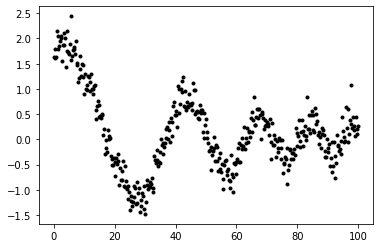

In [3]:
npt = 401
t = numpy.linspace( 0, 100, npt, dtype=float )
ym = 2 * numpy.sin( 2 * math.pi * numpy.exp( t / 60 ) +1 ) * numpy.exp( -0.02 * t )
y = numpy.random.seed( 12345 )
y = ym + numpy.random.randn( npt ) * 0.2
plt.plot( t, y, 'k.' )
plt.show()

In [4]:
knots =[0, 25, 50, 75, 100]
mxk = 15
mdl = SplinesDynamicModel( knots=knots, dynamic=True, maxKnots=mxk, minKnots=4, minDistance=0.03 )
mdl.setLimits( lowLimits=[-10.0], highLimits=[+10.0] )

ep = EvidenceProblem( model=mdl, xdata=t, ydata=y )

Fit all parameters of
  DynModBasicSplines of order 3 with 5 knots.
Using a ModelDistribution with unknown scale
Moving the walkers with   BirthEngine  DeathEngine  StructureEngine
Iteration     logZ        H       LowL     npar parameters                                   scale
       0      -304.      6.0      -298.      9  [    2.114    1.702   -2.157    1.291 ...    0.472]


     100      -156.      5.1      -151.     11  [    1.753    1.939    1.866   -0.419 ...    0.318]


     200      -106.      4.8      -100.     14  [    1.743    2.341    0.929   -0.279 ...    0.272]


     300      -76.1      5.2      -70.0     14  [    1.770    1.966    1.660   -1.549 ...    0.251]


     400      -50.1      6.4      -42.9     15  [    1.733    2.171    1.540   -0.035 ...    0.232]


     500      -33.1      6.9      -25.0     15  [    1.786    2.065    1.514    0.116 ...    0.222]


     600      -20.0      7.3      -11.7     16  [    1.812    2.191    0.264   -1.774 ...    0.212]


     700      -14.0      7.4      -5.46     13  [    1.700    2.138    1.065   -2.882 ...    0.215]


     800      -9.94      8.0     -0.787     16  [    1.744    2.807   -3.657    0.539 ...    0.206]


     900      -7.35      8.5       2.45     14  [    1.797    2.014    1.498   -1.391 ...    0.208]


    1000      -5.53      9.1       4.94     14  [    1.745    2.633   -1.163   -1.181 ...    0.207]


    1100      -4.10      9.8       7.20     14  [    1.716    2.010    1.640   -3.145 ...    0.206]


    1200      -2.87     10.5       9.11     14  [    1.712    2.909   -3.029    0.356 ...    0.205]


    1300      -1.92     11.1       11.0     13  [    1.767    2.753   -3.803    2.595 ...    0.206]


    1400      -1.24     11.6       12.2     13  [    1.747    2.237    0.499   -2.371 ...    0.205]


    1500     -0.719     12.1       13.6     13  [    1.722    2.856   -3.935    2.451 ...    0.205]


    1600     -0.290     12.7       14.7     13  [    1.721    2.844   -4.070    2.332 ...    0.204]


    1700     0.0334     13.1       15.7     13  [    1.738    2.820   -3.704    0.989 ...    0.203]


    1800      0.244     13.5       16.5     13  [    1.732    2.812   -4.021    2.414 ...    0.203]


    1900      0.393     13.8       17.3     12  [    1.694    2.895   -4.025    2.847 ...    0.205]


    2000      0.493     14.0       18.0     12  [    1.741    2.802   -3.938    2.634 ...    0.204]


    2100      0.559     14.2       18.7     12  [    1.730    2.805   -4.083    2.430 ...    0.204]


    2200      0.602     14.3       19.2     12  [    1.716    2.835   -4.058    2.512 ...    0.204]


    2300      0.629     14.4       19.7     12  [    1.736    2.789   -4.027    2.499 ...    0.203]


    2400      0.643     14.5       20.1     12  [    1.738    2.825   -3.903    2.517 ...    0.203]


    2500      0.650     14.5       20.5     12  [    1.700    2.891   -4.065    2.506 ...    0.203]


    2600      0.654     14.5       20.8     12  [    1.730    2.813   -4.001    2.530 ...    0.203]


    2700      0.656     14.5       21.0     12  [    1.724    2.828   -4.029    2.464 ...    0.203]


    2800      0.657     14.5       21.3     12  [    1.725    2.830   -3.971    2.564 ...    0.202]


    2900      0.658     14.5       21.4     12  [    1.740    2.796   -3.971    2.533 ...    0.202]


    2907      0.658     14.5       21.4     12 
[    1.710    2.876   -3.980    2.501   -1.974    1.364   -1.300    1.138   -1.245    0.931    0.098    0.202]
Engines              success     reject     failed       best      calls
BirthEngine              807      30936       5097          0      11355
DeathEngine              690       4620       6045          0      11355
StructureEngine        31178          0      55829          0      11355
Calls to LogL         118642
Samples        3007
Evidence         0.286 +-      0.166


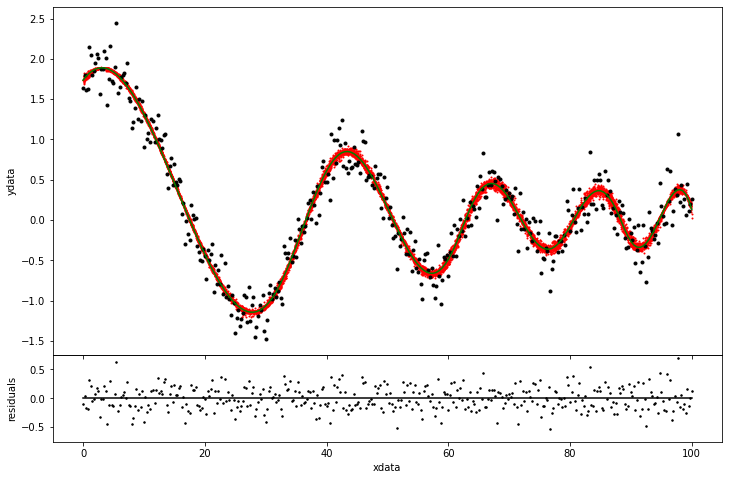

In [5]:
distr = ModelDistribution( limits=[0.01,1] )

ns = NestedSampler( problem=ep, distribution=distr )

ns.verbose = 2

evid = ns.sample( plot=True )



In [6]:
sl = ns.samples
kmed = sl.getMedianIndex()
smpl = sl[kmed]
print( fmt( smpl.model.knots, max=None ) )
print( fmt( smpl.model.parameters, max=None ) )
print( fmt( sl[-1].model.knots, max=None ) )
print( fmt( sl[-1].model.parameters, max=None ) )

[    0.000   24.551   27.268   43.477   58.041   66.355   77.750   83.070   92.299  100.000]
[    1.779    2.434   -0.429   -1.664    2.808   -1.914    1.451   -1.196    1.063   -1.241    0.785    0.144]
[    0.000   30.508   42.812   58.773   66.559   76.833   85.196   92.049  100.000]
[    1.710    2.876   -3.980    2.501   -1.974    1.364   -1.300    1.138   -1.245    0.931    0.098]


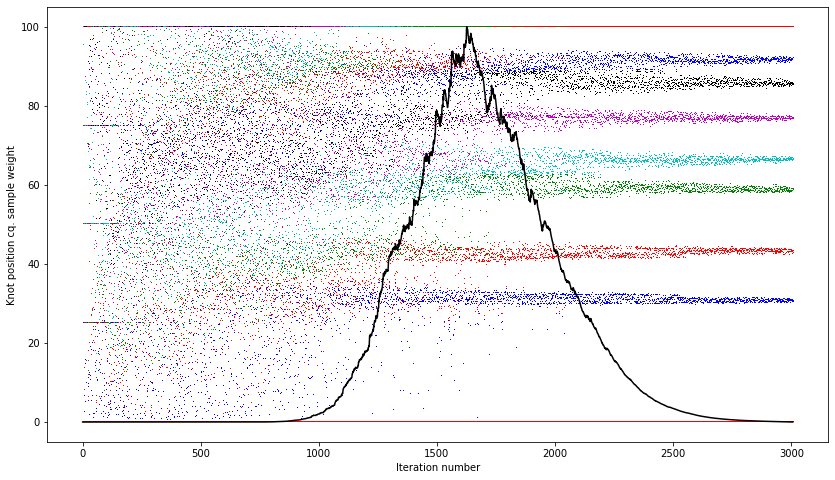

In [7]:
## Plot the evolutie of knots and sample weights
cc = ['k,', 'b,', 'r,', 'g,', 'c,', 'm,']
sl = ns.samples
ka = numpy.zeros( ( mxk, len( sl ) ), dtype=float )
plt.figure( 1, figsize=[14,8] )
for k,s in enumerate( sl ) :
    n = len( s.model.knots )
    ka[:n,k] = s.model.knots
for j in range( mxk ) :
    plt.plot( ka[j,:], cc[j%6] )
wgts = sl.getWeightEvolution()
mw = max( wgts )
plt.plot( 100 * wgts / mw, 'k-' )
plt.xlabel( "Iteration number" )
plt.ylabel( "Knot position cq. sample weight")
plt.show()

